In [1]:
# from __future__ import division
import itertools

# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from scipy.stats import spearmanr
from sklearn import metrics
from random import randint


# Vis Imports
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D
from wordcloud import WordCloud
from PIL import Image

# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import MiniBatchKMeans, KMeans
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# NLP Imports
import unicodedata
import re
import json
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# Custom Module Imports
import model

In [2]:
def basic_clean(original):
    article = original.lower()
    article = unicodedata.normalize('NFKD', article)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    #use re.sub to remove special characters
    article = re.sub(r'[^a-z\s]', '', article)
#   article = re.sub(r'[a-z]{20,}', '', article)
#   article = re.sub(r'\s+', ' ', article)
    return article

def tokenize(article):
    #create the tokenizer
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    article = tokenize.tokenize(article, return_str=True)
    return article

def stem(article):
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    stems = [ps.stem(word) for word in article.split()]
    #join words back together
    article_stemmed = ' '.join(stems)
    return article_stemmed

def lemmatize(article):
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    lemmas = [wnl.lemmatize(word) for word in article.split()]
    #join words back together
    article_lemmatized = ' '.join(lemmas)
    return article_lemmatized

more_stopwords = ['like', 'im', 'think', 'dont', 'people', 'know', 'one', 'get', 'really', 'thing',
                  'would', 'time', 'type', 'make', 'friend', 'ive', 'feel', 'much', 'love',
                 'say', 'way', 'see', 'thing', 'want', 'thing', 'good', 'something', 'lot',
                  'also', 'go', 'always', 'even', 'well', 'someone', 'co', 'thing', 'https',
                  'could', 'year', 'cant', 'w', 'sent', 'iphone']

def remove_stopwords(article):
    #save stopwords
    stopwords_ls = stopwords.words('english', 'spanish') + more_stopwords
    words = article.split()
    #remove stopwords from list of words
    filtered_words = [word for word in words if word not in stopwords_ls]
    #join words back together
    article = ' '.join(filtered_words)
    return article

In [3]:
def prepare_article(original):
    original['stemmed'] = original['posts'].apply(basic_clean).apply(tokenize).apply(remove_stopwords).apply(stem)
    original['lemmatized'] = original['posts'].apply(basic_clean).apply(tokenize).apply(remove_stopwords).apply(lemmatize)
    original.rename(columns = {'posts':'original'}, inplace = True)
    return original

In [4]:
#defining function filter 
def filter(x):
    if x == 'INTJ' or x == 'INTP' or x == 'ENTJ' or x == 'ENTP':
        return 'Analyst'
    if x == 'INFJ' or x == 'INFP' or x == 'ENFJ' or x == 'ENFP':
        return 'Diplomat'
    if x == 'ISTJ' or x == 'ISFJ' or x == 'ESTJ' or x == 'ESFJ':
        return 'Sentinel'
    if x == 'ISTP' or x == 'ISFP' or x == 'ESTP' or x == 'ESFP':
        return 'Explorer'

In [5]:
#defining function filter 
def filter_alt(x):
    if x == 'intj' or x == 'intp' or x == 'entj' or x == 'entp':
        return 'Analyst'
    if x == 'infj' or x == 'infp' or x == 'enfj' or x == 'enfp':
        return 'Diplomat'
    if x == 'istj' or x == 'isfj' or x == 'estj' or x == 'esfj':
        return 'Sentinel'
    if x == 'istp' or x == 'isfp' or x == 'estp' or x == 'esfp':
        return 'Explorer'

In [6]:
#defining function filter 
def filter_2(x):
    if x == 'INTJ':
        return 0
    if x == 'INTP':
        return 1
    if x == 'ENTJ':
        return 2
    if x == 'ENTP':
        return 3
    if x == 'INFJ':
        return 4
    if x == 'INFP':
        return 5
    if x == 'ENFJ': 
        return 6
    if x == 'ENFP':
        return 7
    if x == 'ISTJ':
        return 8
    if x == 'ISFJ': 
        return 9
    if x == 'ESTJ':
        return 10
    if x == 'ESFJ':
        return 11
    if x == 'ISTP':
        return 12
    if x == 'ISFP':
        return 13
    if x == 'ESTP':
        return 14
    if x == 'ESFP':
        return 15

In [7]:
#defining function filter 
def filter_2_alt(x):
    if x == 'intj':
        return 0
    if x == 'intp':
        return 1
    if x == 'entj':
        return 2
    if x == 'entp':
        return 3
    if x == 'infj':
        return 4
    if x == 'infp':
        return 5
    if x == 'enfj': 
        return 6
    if x == 'enfp':
        return 7
    if x == 'istj':
        return 8
    if x == 'isfj': 
        return 9
    if x == 'estj':
        return 10
    if x == 'esfj':
        return 11
    if x == 'istp':
        return 12
    if x == 'isfp':
        return 13
    if x == 'estp':
        return 14
    if x == 'esfp':
        return 15

In [29]:
#defining function filter 
def filter_3(x):
    if x == 'Analyst':
        return 0
    if x == 'Diplomat':
        return 1
    if x == 'Explorer':
        return 2
    if x == 'Sentinel':
        return 3

In [9]:
def run_kmeans(train, max_centroids=15):
    '''
    This function takes in the scaled train data set (continuous features only)
    and the max number of centroids desired.
    
    Outputs the seaborn plot of centroids vs inertia to visualize the 'elbow' method.
    '''
    
    n = 1
    points = {}
    while n <= max_centroids:
        km = KMeans(n_clusters = n)
        km.fit(train)
        points[f'km_{n}'] = {'centroids':n, 'inertia': km.inertia_}
        n+=1
    
    points = pd.DataFrame(points).T
    
    sns.relplot(data=points, x='centroids', y='inertia').set(title='Elbow Method Plot')
    # x = range(0,40,1)
    # y = range(0,40,1)
    # plt.plot(x,y)
    # plt.xlim(0)
    # plt.ylim(0)
    plt.grid()
    plt.show()

In [82]:
original = pd.read_pickle('aggName_wo_emojis.pkl')
original.rename(columns={'domain': 'personality_domain'}, inplace=True)
df1 = original
df1 = df1[['type', 'lemmatized']]

In [83]:
# original = pd.read_pickle('aggName.pkl')
# original['lemmatized'] = [' '.join(map(str, x)) for x in original['lemmatized']]
# original.rename(columns={'domain': 'personality_domain'}, inplace=True)
# df1 = original
# df1 = df1[['type', 'lemmatized']]

In [84]:
original = pd.read_csv('mbti_1.csv')
df0 = prepare_article(original)
df0 = df0[['type', 'lemmatized']]
df0['type'] = df0['type'].str.lower()


In [85]:
df0.head()

,type,lemmatized
0,infj,httpwwwyoutubecomwatchvqsxhcwekrwhttpmediatumb...
1,entp,finding lack post alarmingsex boring position ...
2,intp,httpswwwyoutubecomwatchvfhigbolffgwof course t...
3,intj,dear intp enjoyed conversation day esoteric ga...
4,entj,youre firedthats another silly misconception a...


In [86]:
df1.head()

,type,lemmatized
0,enfj,love hearing voice dubbed german artede artefr...
1,enfj,aaayyyyy could call candy played lazer tag wen...
2,enfj,yeah laundry lol pennys fan pink sweater skull...
3,enfj,favorite annoyed uneasy hesitant classic itali...
4,enfj,nice meet loved chatting best annoyed uneasy h...


In [87]:
df = pd.concat([df0, df1])
df.isnull().sum()

type          0
lemmatized    0
dtype: int64

In [88]:
df.type.value_counts()

infp    1844
infj    1491
intp    1312
intj    1102
entp     726
enfp     723
istp     364
isfp     310
entj     251
enfj     219
istj     215
isfj     194
esfp     135
estp     131
esfj      87
estj      56
Name: type, dtype: int64

In [89]:
df['personality_domain'] = df['type'].apply(filter_alt)
df['I_E'] = df['type'].astype(str).str[0]
df['N_S'] = df['type'].astype(str).str[1]
df['T_F'] = df['type'].astype(str).str[2]
df['J_P'] = df['type'].astype(str).str[3]
df = df[['type', 'personality_domain', 'I_E', 'N_S', 'T_F', 'J_P', 'lemmatized']]
df.head()

,type,personality_domain,I_E,N_S,T_F,J_P,lemmatized
0,infj,Diplomat,i,n,f,j,httpwwwyoutubecomwatchvqsxhcwekrwhttpmediatumb...
1,entp,Analyst,e,n,t,p,finding lack post alarmingsex boring position ...
2,intp,Analyst,i,n,t,p,httpswwwyoutubecomwatchvfhigbolffgwof course t...
3,intj,Analyst,i,n,t,j,dear intp enjoyed conversation day esoteric ga...
4,entj,Analyst,e,n,t,j,youre firedthats another silly misconception a...


In [90]:
df.personality_domain.value_counts()

Diplomat    4277
Analyst     3391
Explorer     940
Sentinel     552
Name: personality_domain, dtype: int64

In [91]:
# df['type'] = df['type'].str.lower()
# df['personality_domain'] = df['personality_domain'].str.lower()
# df['I_E'] = df['I_E'].str.lower()
# df['N_S'] = df['N_S'].str.lower()
# df['T_F'] = df['T_F'].str.lower()
# df['J_P'] = df['J_P'].str.lower()
# df.head()

## 16 types

In [92]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.type
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

# Make the object and fit/transform it
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
# Split X and y into train, validate, and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_lm'] = lm.predict(X_train)
validate['bow_predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_MNBclf'] = MNBclf.predict(X_train)
validate['bow_predicted_MNBclf'] = MNBclf.predict(X_validate)

# Print out the results
print('Bag of Words Logistic Regression 16 Personalities Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
print('-------------')
print('Bag of Words Logistic Regression 16 Personalities Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
print('-------------')
print('Bag of Words MultinomialNB 16 Personalities Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_MNBclf)))
print('-------------')
print('Bag of Words MultinomialNB 16 Personalities Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Train 16 Personalities Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB 16 Personalities Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')
print('TF-IDF Logistic Regression 16 Personalities Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('TF-IDF Logistic Regression 16 Personalities Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')

Bag of Words Logistic Regression 16 Personalities Train Accuracy: 99.71%
-------------
Bag of Words Logistic Regression 16 Personalities Validate Accuracy: 58.13%
-------------
Bag of Words MultinomialNB 16 Personalities Train Accuracy: 55.39%
-------------
Bag of Words MultinomialNB 16 Personalities Validate Accuracy: 25.00%
-------------
TF-IDF MultinomialNB Train 16 Personalities Accuracy: 20.51%
-------------
TF-IDF MultinomialNB 16 Personalities Validate Accuracy: 20.14%
-------------
TF-IDF Logistic Regression 16 Personalities Train Accuracy: 79.00%
-------------
TF-IDF Logistic Regression 16 Personalities Validate Accuracy: 55.84%
-------------


In [93]:
# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(train.lemmatized)
# run_kmeans(X, 20)

In [94]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(train.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=8, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
train['cluster'] = cluster.labels_
dummies = pd.get_dummies(train.cluster, prefix='clust')
train = pd.concat([train, dummies], axis=1)

# Transform
X = tfidf.transform(validate.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=8, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
validate['cluster'] = cluster.labels_
dummies = pd.get_dummies(validate.cluster, prefix='clust')
validate = pd.concat([validate, dummies], axis=1)

# Transform
X = tfidf.transform(test.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=8, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
test['cluster'] = cluster.labels_
dummies = pd.get_dummies(test.cluster, prefix='clust')
test = pd.concat([test, dummies], axis=1)

# Features
X_train = train[['clust_0', 'clust_1', 'clust_2', 'clust_3', 'clust_4', 'clust_5', 'clust_6', 'clust_7']]
# What we are predicting
y_train = train.type

# Features
X_validate = validate[['clust_0', 'clust_1', 'clust_2', 'clust_3', 'clust_4', 'clust_5', 'clust_6', 'clust_7']]
# What we are predicting
y_validate = validate.type

# Features
X_test = test[['clust_0', 'clust_1', 'clust_2', 'clust_3', 'clust_4', 'clust_5', 'clust_6', 'clust_7']]
# What we are predicting
y_test = test.type

# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)


# Print out the results
print('Cluster Logistic Regression 16 Personalities Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('Cluster Logistic Regression 16 Personalities Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')
print('Cluster MultinomialNB 16 Personalities Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('Cluster MultinomialNB 16 Personalities Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')

Cluster Logistic Regression 16 Personalities Train Accuracy: 28.73%
-------------
Cluster Logistic Regression 16 Personalities Validate Accuracy: 6.06%
-------------
Cluster MultinomialNB 16 Personalities Train Accuracy: 28.73%
-------------
Cluster MultinomialNB 16 Personalities Validate Accuracy: 6.06%
-------------


In [95]:
df.isnull().sum()

type                  0
personality_domain    0
I_E                   0
N_S                   0
T_F                   0
J_P                   0
lemmatized            0
dtype: int64

In [96]:
df['type_encoded'] = df['type'].apply(filter_2_alt)

# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.type_encoded
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=123)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_validate, y_validate)))

Learning rate:  0.05
Accuracy score (training): 0.204
Accuracy score (validation): 0.201
Learning rate:  0.075
Accuracy score (training): 0.208
Accuracy score (validation): 0.201
Learning rate:  0.1
Accuracy score (training): 0.210
Accuracy score (validation): 0.201
Learning rate:  0.25
Accuracy score (training): 0.213
Accuracy score (validation): 0.200
Learning rate:  0.5
Accuracy score (training): 0.214
Accuracy score (validation): 0.198
Learning rate:  0.75
Accuracy score (training): 0.215
Accuracy score (validation): 0.199
Learning rate:  1
Accuracy score (training): 0.215
Accuracy score (validation): 0.199


In [97]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_validate, y_validate)
print('XBG TF-IDF 16 Personalities Validate Accuracy:', score, '%')

XBG TF-IDF 16 Personalities Validate Accuracy: 0.6080786026200873 %


## Personality domains

In [98]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.personality_domain
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

# Make the object and fit/transform it
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
# Split X and y into train, validate, and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_lm'] = lm.predict(X_train)
validate['bow_predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_MNBclf'] = MNBclf.predict(X_train)
validate['bow_predicted_MNBclf'] = MNBclf.predict(X_validate)

# Print out the results
print('Bag of Words Logistic Regression Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
print('-------------')
print('Bag of Words Logistic Regression Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
print('-------------')
print('Bag of Words MultinomialNB Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_MNBclf)))
print('-------------')
print('Bag of Words MultinomialNB Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')
print('TF-IDF Logistic Regression Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('TF-IDF Logistic Regression Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')

Bag of Words Logistic Regression Personality Domain Train Accuracy: 99.95%
-------------
Bag of Words Logistic Regression Personality Domain Validate Accuracy: 73.64%
-------------
Bag of Words MultinomialNB Personality Domain Train Accuracy: 83.37%
-------------
Bag of Words MultinomialNB Personality Domain Validate Accuracy: 61.68%
-------------
TF-IDF MultinomialNB Personality Domain Train Accuracy: 47.31%
-------------
TF-IDF MultinomialNB Personality Domain Validate Accuracy: 46.67%
-------------
TF-IDF Logistic Regression Personality Domain Train Accuracy: 88.21%
-------------
TF-IDF Logistic Regression Personality Domain Validate Accuracy: 73.69%
-------------


In [99]:
# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(train.lemmatized)
# run_kmeans(X, 20)

In [100]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(train.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
train['cluster'] = cluster.labels_
dummies = pd.get_dummies(train.cluster, prefix='clust')
train = pd.concat([train, dummies], axis=1)

# Transform
X = tfidf.transform(validate.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
validate['cluster'] = cluster.labels_
dummies = pd.get_dummies(validate.cluster, prefix='clust')
validate = pd.concat([validate, dummies], axis=1)

# Transform
X = tfidf.transform(test.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
test['cluster'] = cluster.labels_
dummies = pd.get_dummies(test.cluster, prefix='clust')
test = pd.concat([test, dummies], axis=1)

# Features
X_train = train[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
# What we are predicting
y_train = train.type

# Features
X_validate = validate[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
# What we are predicting
y_validate = validate.type

# Features
X_test = test[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
# What we are predicting
y_test = test.type

# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)


# Print out the results
print('Cluster Logistic Regression Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('Cluster Logistic Regression Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')
print('Cluster MultinomialNB Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('Cluster MultinomialNB Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')

Cluster Logistic Regression Personality Domain Train Accuracy: 22.82%
-------------
Cluster Logistic Regression Personality Domain Validate Accuracy: 13.76%
-------------
Cluster MultinomialNB Personality Domain Train Accuracy: 22.82%
-------------
Cluster MultinomialNB Personality Domain Validate Accuracy: 13.76%
-------------


In [101]:
df['personality_domain_encoded'] = df['personality_domain'].apply(filter_3)

# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.personality_domain_encoded
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=123)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_validate, y_validate)))

Learning rate:  0.05
Accuracy score (training): 0.467
Accuracy score (validation): 0.467
Learning rate:  0.075
Accuracy score (training): 0.467
Accuracy score (validation): 0.467
Learning rate:  0.1
Accuracy score (training): 0.467
Accuracy score (validation): 0.467
Learning rate:  0.25
Accuracy score (training): 0.482
Accuracy score (validation): 0.467
Learning rate:  0.5
Accuracy score (training): 0.482
Accuracy score (validation): 0.466
Learning rate:  0.75
Accuracy score (training): 0.488
Accuracy score (validation): 0.464
Learning rate:  1
Accuracy score (training): 0.488
Accuracy score (validation): 0.464


In [102]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_validate, y_validate)
print('XBG TF-IDF Personality Domain Validate Accuracy:', score, '%')

XBG TF-IDF Personality Domain Validate Accuracy: 0.7581877729257642 %


In [103]:
score = xgb_clf.score(X_test, y_test)
print('XBG TF-IDF Personality Domain Test Accuracy:', score, '%')

XBG TF-IDF Personality Domain Test Accuracy: 0.7352620087336245 %


## Pairwise I vs E

In [104]:
df.head()

,type,personality_domain,I_E,N_S,T_F,J_P,lemmatized,type_encoded,personality_domain_encoded
0,infj,Diplomat,i,n,f,j,httpwwwyoutubecomwatchvqsxhcwekrwhttpmediatumb...,4,1
1,entp,Analyst,e,n,t,p,finding lack post alarmingsex boring position ...,3,0
2,intp,Analyst,i,n,t,p,httpswwwyoutubecomwatchvfhigbolffgwof course t...,1,0
3,intj,Analyst,i,n,t,j,dear intp enjoyed conversation day esoteric ga...,0,0
4,entj,Analyst,e,n,t,j,youre firedthats another silly misconception a...,2,0


In [105]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.I_E
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

# Make the object and fit/transform it
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
# Split X and y into train, validate, and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_lm'] = lm.predict(X_train)
validate['bow_predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_MNBclf'] = MNBclf.predict(X_train)
validate['bow_predicted_MNBclf'] = MNBclf.predict(X_validate)

# Print out the results
print('Bag of Words Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
print('-------------')
print('Bag of Words Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
print('-------------')
print('Bag of Words MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_MNBclf)))
print('-------------')
print('Bag of Words MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')
print('TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')

Bag of Words Logistic Regression Train Accuracy: 100.00%
-------------
Bag of Words Logistic Regression Validate Accuracy: 80.35%
-------------
Bag of Words MultinomialNB Train Accuracy: 77.49%
-------------
Bag of Words MultinomialNB Validate Accuracy: 75.87%
-------------
TF-IDF MultinomialNB Train Accuracy: 74.62%
-------------
TF-IDF MultinomialNB Validate Accuracy: 74.56%
-------------
TF-IDF Logistic Regression Train Accuracy: 85.19%
-------------
TF-IDF Logistic Regression Validate Accuracy: 79.53%
-------------


In [106]:
# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(train.lemmatized)
# run_kmeans(X, 20)

In [107]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(train.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
train['cluster'] = cluster.labels_
dummies = pd.get_dummies(train.cluster, prefix='clust')
train = pd.concat([train, dummies], axis=1)

# Transform
X = tfidf.transform(validate.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
validate['cluster'] = cluster.labels_
dummies = pd.get_dummies(validate.cluster, prefix='clust')
validate = pd.concat([validate, dummies], axis=1)

# Transform
X = tfidf.transform(test.lemmatized)

cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
cluster.fit(X)
yhat = cluster.predict(X)
test['cluster'] = cluster.labels_
dummies = pd.get_dummies(test.cluster, prefix='clust')
test = pd.concat([test, dummies], axis=1)

# Features
X_train = train[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
# What we are predicting
y_train = train.type

# Features
X_validate = validate[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
# What we are predicting
y_validate = validate.type

# Features
X_test = test[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
# What we are predicting
y_test = test.type

# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)


# Print out the results
print('Cluster Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('Cluster Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')
print('Cluster MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('Cluster MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')

Cluster Logistic Regression Train Accuracy: 22.82%
-------------
Cluster Logistic Regression Validate Accuracy: 13.76%
-------------
Cluster MultinomialNB Train Accuracy: 22.82%
-------------
Cluster MultinomialNB Validate Accuracy: 13.76%
-------------


## Pairwise N vs S

In [108]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.N_S
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

# Make the object and fit/transform it
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
# Split X and y into train, validate, and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_lm'] = lm.predict(X_train)
validate['bow_predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_MNBclf'] = MNBclf.predict(X_train)
validate['bow_predicted_MNBclf'] = MNBclf.predict(X_validate)

# Print out the results
print('Bag of Words Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
print('-------------')
print('Bag of Words Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
print('-------------')
print('Bag of Words MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_MNBclf)))
print('-------------')
print('Bag of Words MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')
print('TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')

Bag of Words Logistic Regression Train Accuracy: 100.00%
-------------
Bag of Words Logistic Regression Validate Accuracy: 87.39%
-------------
Bag of Words MultinomialNB Train Accuracy: 85.61%
-------------
Bag of Words MultinomialNB Validate Accuracy: 84.66%
-------------
TF-IDF MultinomialNB Train Accuracy: 83.70%
-------------
TF-IDF MultinomialNB Validate Accuracy: 83.73%
-------------
TF-IDF Logistic Regression Train Accuracy: 86.72%
-------------
TF-IDF Logistic Regression Validate Accuracy: 84.93%
-------------


## Pairwise T vs F

In [109]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.T_F
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

# Make the object and fit/transform it
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
# Split X and y into train, validate, and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_lm'] = lm.predict(X_train)
validate['bow_predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_MNBclf'] = MNBclf.predict(X_train)
validate['bow_predicted_MNBclf'] = MNBclf.predict(X_validate)

# Print out the results
print('Bag of Words Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
print('-------------')
print('Bag of Words Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
print('-------------')
print('Bag of Words MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_MNBclf)))
print('-------------')
print('Bag of Words MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')
print('TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')

Bag of Words Logistic Regression Train Accuracy: 100.00%
-------------
Bag of Words Logistic Regression Validate Accuracy: 80.90%
-------------
Bag of Words MultinomialNB Train Accuracy: 98.85%
-------------
Bag of Words MultinomialNB Validate Accuracy: 79.48%
-------------
TF-IDF MultinomialNB Train Accuracy: 56.73%
-------------
TF-IDF MultinomialNB Validate Accuracy: 54.69%
-------------
TF-IDF Logistic Regression Train Accuracy: 93.56%
-------------
TF-IDF Logistic Regression Validate Accuracy: 84.88%
-------------


## Pairwise J vs P


In [110]:
# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.J_P
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train = pd.DataFrame(dict(actual=y_train))
validate = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['predicted_lm'] = lm.predict(X_train)
validate['predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['predicted_MNBclf'] = MNBclf.predict(X_train)
validate['predicted_MNBclf'] = MNBclf.predict(X_validate)

# Make the object and fit/transform it
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
# Split X and y into train, validate, and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_lm'] = lm.predict(X_train)
validate['bow_predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_MNBclf'] = MNBclf.predict(X_train)
validate['bow_predicted_MNBclf'] = MNBclf.predict(X_validate)

# Print out the results
print('Bag of Words Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
print('-------------')
print('Bag of Words Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
print('-------------')
print('Bag of Words MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_MNBclf)))
print('-------------')
print('Bag of Words MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')
print('TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')

Bag of Words Logistic Regression Train Accuracy: 99.98%
-------------
Bag of Words Logistic Regression Validate Accuracy: 73.64%
-------------
Bag of Words MultinomialNB Train Accuracy: 97.65%
-------------
Bag of Words MultinomialNB Validate Accuracy: 62.23%
-------------
TF-IDF MultinomialNB Train Accuracy: 60.61%
-------------
TF-IDF MultinomialNB Validate Accuracy: 60.53%
-------------
TF-IDF Logistic Regression Train Accuracy: 88.70%
-------------
TF-IDF Logistic Regression Validate Accuracy: 76.09%
-------------


## Putting it all together

In [111]:
# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.I_E
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train_1 = pd.DataFrame(dict(actual=y_train))
validate_1 = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train_1['i_e_predicted_lm'] = lm.predict(X_train)
validate_1['i_e_predicted_lm'] = lm.predict(X_validate)

# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.N_S
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train_2 = pd.DataFrame(dict(actual=y_train))
validate_2 = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train_2['n_s_predicted_lm'] = lm.predict(X_train)
validate_2['n_s_predicted_lm'] = lm.predict(X_validate)

# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.T_F
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train_3 = pd.DataFrame(dict(actual=y_train))
validate_3 = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train_3['t_f_predicted_lm'] = lm.predict(X_train)
validate_3['t_f_predicted_lm'] = lm.predict(X_validate)

# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.J_P
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make train and validate a dataframe
train_4 = pd.DataFrame(dict(actual=y_train))
validate_4 = pd.DataFrame(dict(actual=y_validate))
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train_4['j_p_predicted_lm'] = lm.predict(X_train)
validate_4['j_p_predicted_lm'] = lm.predict(X_validate)

# Print out the results
print('-------------')
print('I vs E TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train_1.actual, train_1.i_e_predicted_lm)))
print('-------------')
print('I vs E TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate_1.actual, validate_1.i_e_predicted_lm)))
print('-------------')
print('N vs S TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train_2.actual, train_2.n_s_predicted_lm)))
print('-------------')
print('N vs S TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate_2.actual, validate_2.n_s_predicted_lm)))
print('-------------')
print('T vs F TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train_3.actual, train_3.t_f_predicted_lm)))
print('-------------')
print('T vs F TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate_3.actual, validate_3.t_f_predicted_lm)))
print('-------------')
print('J vs P TF-IDF Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train_4.actual, train_4.j_p_predicted_lm)))
print('-------------')
print('J vs P TF-IDF Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate_4.actual, validate_4.j_p_predicted_lm)))
print('-------------')

-------------
I vs E TF-IDF Logistic Regression Train Accuracy: 85.19%
-------------
I vs E TF-IDF Logistic Regression Validate Accuracy: 79.53%
-------------
N vs S TF-IDF Logistic Regression Train Accuracy: 86.72%
-------------
N vs S TF-IDF Logistic Regression Validate Accuracy: 84.93%
-------------
T vs F TF-IDF Logistic Regression Train Accuracy: 93.56%
-------------
T vs F TF-IDF Logistic Regression Validate Accuracy: 84.88%
-------------
J vs P TF-IDF Logistic Regression Train Accuracy: 88.70%
-------------
J vs P TF-IDF Logistic Regression Validate Accuracy: 76.09%
-------------


In [112]:
train = train.reset_index()
train_1 = train_1.reset_index()
train_2 = train_2.reset_index()
train_3 = train_3.reset_index()
train_4 = train_4.reset_index()

In [113]:
validate = validate.reset_index()
validate_1 = validate_1.reset_index()
validate_2 = validate_2.reset_index()
validate_3 = validate_3.reset_index()
validate_4 = validate_4.reset_index()

In [114]:
train['i_e_predicted_lm'] = train_1['i_e_predicted_lm']
train['n_s_predicted_lm'] = train_2['n_s_predicted_lm']
train['t_f_predicted_lm'] = train_3['t_f_predicted_lm']
train['j_p_predicted_lm'] = train_4['j_p_predicted_lm']
validate['i_e_predicted_lm'] = validate_1['i_e_predicted_lm']
validate['n_s_predicted_lm'] = validate_2['n_s_predicted_lm']
validate['t_f_predicted_lm'] = validate_3['t_f_predicted_lm']
validate['j_p_predicted_lm'] = validate_4['j_p_predicted_lm']

In [115]:
train_results = train[['type', 'i_e_predicted_lm', 'n_s_predicted_lm', 't_f_predicted_lm', 'j_p_predicted_lm']]

In [116]:
train_results.head()

,type,i_e_predicted_lm,n_s_predicted_lm,t_f_predicted_lm,j_p_predicted_lm
0,istp,i,n,t,j
1,enfp,i,s,t,j
2,intj,i,n,f,p
3,infp,e,n,t,p
4,infp,i,n,f,p


In [117]:
train_results["predicted_type"] = train_results["i_e_predicted_lm"] + train_results["n_s_predicted_lm"] + train_results["t_f_predicted_lm"] + train_results["j_p_predicted_lm"]


In [118]:
train_results = train_results[['type', 'predicted_type', 'i_e_predicted_lm', 'n_s_predicted_lm', 't_f_predicted_lm', 'j_p_predicted_lm']]

In [119]:
train_results.head()

,type,predicted_type,i_e_predicted_lm,n_s_predicted_lm,t_f_predicted_lm,j_p_predicted_lm
0,istp,intj,i,n,t,j
1,enfp,istj,i,s,t,j
2,intj,infp,i,n,f,p
3,infp,entp,e,n,t,p
4,infp,infp,i,n,f,p


In [120]:
validate_reults = validate[['type', 'i_e_predicted_lm', 'n_s_predicted_lm', 't_f_predicted_lm', 'j_p_predicted_lm']]
validate_reults["predicted_type"] = validate_reults["i_e_predicted_lm"] + validate_reults["n_s_predicted_lm"] + validate_reults["t_f_predicted_lm"] + validate_reults["j_p_predicted_lm"]
validate_reults = validate_reults[['type', 'predicted_type', 'i_e_predicted_lm', 'n_s_predicted_lm', 't_f_predicted_lm', 'j_p_predicted_lm']]


In [121]:
print('TF-IDF Pairwise Logistic Regression Train Accuracy:', round(((train_results.type == train_results.predicted_type).sum()/ (train_results.shape[0]) * 100), 2), '%')
print('TF-IDF Pairwise Logistic Regression Validate Accuracy:', round(((validate_reults.type == validate_reults.predicted_type).sum()/ (validate_reults.shape[0]) * 100), 2), '%')


TF-IDF Pairwise Logistic Regression Train Accuracy: 14.77 %
TF-IDF Pairwise Logistic Regression Validate Accuracy: 14.9 %


In [122]:
df.personality_domain.value_counts()

Diplomat    4277
Analyst     3391
Explorer     940
Sentinel     552
Name: personality_domain, dtype: int64

In [123]:
df.shape


(9160, 9)

In [124]:
print('16 Personality Baseline Accuracy:',round((1844/9160) * 100, 2),'%')
print('-------------')
print('Personality Domain Baseline Accuracy:',round((4277/9160) * 100, 2),'%')


16 Personality Baseline Accuracy: 20.13 %
-------------
Personality Domain Baseline Accuracy: 46.69 %


___

## Personality Domain into Pairwise

In [56]:
df['personality_domain_encoded'] = df['personality_domain'].apply(filter_3)

# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.personality_domain_encoded
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_validate, y_validate)
print('XBG TF-IDF Personality Domain Validate Accuracy:', round(score * 100, 2), '%')

XBG TF-IDF Personality Domain Validate Accuracy: 76.15 %


In [58]:
val_predict = xgb_clf.predict(X_validate)

In [62]:
val_predict

array([1, 1, 0, ..., 1, 0, 0])

In [64]:
validate['personality_domain_encoded_predicted'] = val_predict

In [65]:
validate

,type,personality_domain,I_E,N_S,T_F,J_P,lemmatized,type_encoded,personality_domain_encoded,personality_domain_encoded_predicted
2945,infj,Diplomat,i,n,f,j,disorder rating information paranoid moderate ...,4,1,1
8054,enfp,Diplomat,e,n,f,p,requires getting point respectably discus matt...,7,1,1
2795,infj,Diplomat,i,n,f,j,memory first year overall image hazy couple me...,4,1,0
1182,infp,Diplomat,i,n,f,p,ever blondhaired blueeyed intp alice alice won...,5,1,1
4367,infj,Diplomat,i,n,f,j,parent responsive need child develop guide pro...,4,1,0
...,...,...,...,...,...,...,...,...,...,...
449,istj,Sentinel,i,s,t,j,thank done wrong love abhishek pride may ef ad...,8,3,0
1129,infj,Diplomat,i,n,f,j,sup brah keep great work help many cani last p...,4,1,1
2517,entp,Analyst,e,n,t,p,curiosity turn outlol oh opinion changed recko...,3,0,1
5920,intp,Analyst,i,n,t,p,haha actually bit worried highly doubt definit...,1,0,0


In [66]:
#defining function filter 
def filter_3_r(x):
    if x == 0:
        return 'Analyst'
    if x == 1:
        return 'Diplomat'
    if x == 2:
        return 'Explorer'
    if x == 3:
        return 'Sentinel'

In [67]:
validate['personality_domain_predicted'] = validate['personality_domain_encoded_predicted'].apply(filter_3_r)


In [68]:
validate

,type,personality_domain,I_E,N_S,T_F,J_P,lemmatized,type_encoded,personality_domain_encoded,personality_domain_encoded_predicted,personality_domain_predicted
2945,infj,Diplomat,i,n,f,j,disorder rating information paranoid moderate ...,4,1,1,Diplomat
8054,enfp,Diplomat,e,n,f,p,requires getting point respectably discus matt...,7,1,1,Diplomat
2795,infj,Diplomat,i,n,f,j,memory first year overall image hazy couple me...,4,1,0,Analyst
1182,infp,Diplomat,i,n,f,p,ever blondhaired blueeyed intp alice alice won...,5,1,1,Diplomat
4367,infj,Diplomat,i,n,f,j,parent responsive need child develop guide pro...,4,1,0,Analyst
...,...,...,...,...,...,...,...,...,...,...,...
449,istj,Sentinel,i,s,t,j,thank done wrong love abhishek pride may ef ad...,8,3,0,Analyst
1129,infj,Diplomat,i,n,f,j,sup brah keep great work help many cani last p...,4,1,1,Diplomat
2517,entp,Analyst,e,n,t,p,curiosity turn outlol oh opinion changed recko...,3,0,1,Diplomat
5920,intp,Analyst,i,n,t,p,haha actually bit worried highly doubt definit...,1,0,0,Analyst


In [69]:
df.head()

,type,personality_domain,I_E,N_S,T_F,J_P,lemmatized,type_encoded,personality_domain_encoded
0,infj,Diplomat,i,n,f,j,httpwwwyoutubecomwatchvqsxhcwekrwhttpmediatumb...,4,1
1,entp,Analyst,e,n,t,p,finding lack post alarmingsex boring position ...,3,0
2,intp,Analyst,i,n,t,p,httpswwwyoutubecomwatchvfhigbolffgwof course t...,1,0
3,intj,Analyst,i,n,t,j,dear intp enjoyed conversation day esoteric ga...,0,0
4,entj,Analyst,e,n,t,j,youre firedthats another silly misconception a...,2,0


In [73]:
df.J_P.value_counts(normalize=True)

p    0.605349
j    0.394651
Name: J_P, dtype: float64

In [ ]:
# Make the object and fit/transform it
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.lemmatized)
# Split X and y into train, validate, and test.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
# Make the object and fit it
lm = LogisticRegression().fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_lm'] = lm.predict(X_train)
validate['bow_predicted_lm'] = lm.predict(X_validate)
# Make the object and fit it
MNBclf = MultinomialNB()
MNBclf.fit(X_train, y_train)
# Make columns for the predictions
train['bow_predicted_MNBclf'] = MNBclf.predict(X_train)
validate['bow_predicted_MNBclf'] = MNBclf.predict(X_validate)

# Print out the results
print('Bag of Words Logistic Regression Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
print('-------------')
print('Bag of Words Logistic Regression Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
print('-------------')
print('TF-IDF MultinomialNB Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_MNBclf)))
print('-------------')
print('TF-IDF MultinomialNB Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_MNBclf)))
print('-------------')
print('TF-IDF Logistic Regression Personality Domain Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_lm)))
print('-------------')
print('TF-IDF Logistic Regression Personality Domain Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.predicted_lm)))
print('-------------')

df['personality_domain_encoded'] = df['personality_domain'].apply(filter_3)

# 60/20/20 Train, Validate, Test split
train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

# Make the object
tfidf = TfidfVectorizer()
# Fit/Transform
X = tfidf.fit_transform(df.lemmatized)
# What we are predicting
y = df.personality_domain_encoded
# Split X and y into train, validate, and test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_validate, y_validate)
print('XBG TF-IDF Personality Domain Validate Accuracy:', score, '%')

In [ ]:
def top_3_personality_domains(df):
    # Make the object and fit/transform it
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df.lemmatized)
    # What we are predicting
    y = df.personality_domain
    # Make train and validate a dataframe
    train = pd.DataFrame(dict(actual=y_train))
    validate = pd.DataFrame(dict(actual=y_validate))
    # Split X and y into train, validate, and test.
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
    X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)
    # Make the object and fit it
    lm = LogisticRegression().fit(X_train, y_train)
    # Make columns for the predictions
    train['bow_predicted_lm'] = lm.predict(X_train)
    validate['bow_predicted_lm'] = lm.predict(X_validate)

    df['personality_domain_encoded'] = df['personality_domain'].apply(filter_3)

    # 60/20/20 Train, Validate, Test split
    train_val, test = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
    train, validate = train_test_split(train_val, stratify=train_val.type, test_size=.25, random_state=123)

    # Make the object
    tfidf = TfidfVectorizer()
    # Fit/Transform
    X = tfidf.fit_transform(df.lemmatized)
    # What we are predicting
    y = df.personality_domain_encoded
    # Split X and y into train, validate, and test 
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=123)
    X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.25, random_state=123)

    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)
    score_0 = xgb_clf.score(X_train, y_train)
    score_1 = xgb_clf.score(X_validate, y_validate)
    
    # 60/20/20 Train, Validate, Test split
    train_val2, test2 = train_test_split(df, stratify=df.type, test_size=.2, random_state=123)
    train2, validate2 = train_test_split(train_val2, stratify=train_val2.type, test_size=.25, random_state=123)

    # Make the object
    tfidf = TfidfVectorizer()
    # Fit/Transform
    X = tfidf.fit_transform(train2.lemmatized)

    cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
    cluster.fit(X)
    yhat = cluster.predict(X)
    train2['cluster'] = cluster.labels_
    dummies = pd.get_dummies(train2.cluster, prefix='clust')
    train2 = pd.concat([train2, dummies], axis=1)

    # Transform
    X = tfidf.transform(validate2.lemmatized)

    cluster = KMeans(init = 'k-means++', n_clusters=4, n_init=15, random_state=123)
    cluster.fit(X)
    yhat = cluster.predict(X)
    validate2['cluster'] = cluster.labels_
    dummies = pd.get_dummies(validate2.cluster, prefix='clust')
    validate2 = pd.concat([validate2, dummies], axis=1)

    # Features
    X_train = train2[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
    # What we are predicting
    y_train = train2.personality_domain

    # Features
    X_validate = validate2[['clust_0', 'clust_1', 'clust_2', 'clust_3']]
    # What we are predicting
    y_validate = validate2.type

    # Make train and validate a dataframe
    train2 = pd.DataFrame(dict(actual=y_train))
    validate2 = pd.DataFrame(dict(actual=y_validate))
    # Make the object and fit it
    MNBclf = MultinomialNB()
    MNBclf.fit(X_train, y_train)
    # Make columns for the predictions
    train2['clust_predicted_MNBclf'] = MNBclf.predict(X_train)
    validate2['clust_predicted_MNBclf'] = MNBclf.predict(X_validate)

    # Print out the results
    print('Top Model per Feature')
    print('-------------')
    print('Bag of Words Logistic Regression Train Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.bow_predicted_lm)))
    print('-------------')
    print('Bag of Words Logistic Regression Validate Accuracy: {:.2%}'.format(accuracy_score(validate.actual, validate.bow_predicted_lm)))
    print('-------------')
    print('XBG TF-IDF Personality Domain Train Accuracy:', round(score_0 * 100, 2), '%')
    print('-------------')
    print('XBG TF-IDF Personality Domain Validate Accuracy:', round(score_1 * 100,2), '%')
    print('-------------')
    print()
    print()
    print('Top Clustering Model')
    print('-------------')
    print('Cluster MultinomialNB Train Accuracy: {:.2%}'.format(accuracy_score(train2.actual, train2.clust_predicted_MNBclf)))
    print('-------------')
    print('Cluster MultinomialNB Validate Accuracy: {:.2%}'.format(accuracy_score(validate2.actual, validate2.clust_predicted_MNBclf)))
    print('-------------')

## Fixing Visuals for Canva

- 4 domains word cloud
- updated twitter bird
- twitter bird with models

In [126]:
df.personality_domain.value_counts()

Diplomat    4277
Analyst     3391
Explorer     940
Sentinel     552
Name: personality_domain, dtype: int64

In [129]:
Diplomat_words = (' '.join(train[train.personality_domain == 'Diplomat'].lemmatized)).split()
Analyst_words = (' '.join(train[train.personality_domain == 'Analyst'].lemmatized)).split()
Explorer_words = (' '.join(train[train.personality_domain == 'Explorer'].lemmatized)).split()
Sentinel_words = (' '.join(train[train.personality_domain == 'Sentinel'].lemmatized)).split()
Diplomat_cloud = WordCloud(background_color='white', height=800, width=800).generate(' '.join(Diplomat_words))
Analyst_cloud = WordCloud(background_color='white', height=800, width=800).generate(' '.join(Analyst_words))
Explorer_cloud = WordCloud(background_color='white', height=800, width=800).generate(' '.join(Explorer_words))
Sentinel_cloud = WordCloud(background_color='white', height=800, width=800).generate(' '.join(Sentinel_words))


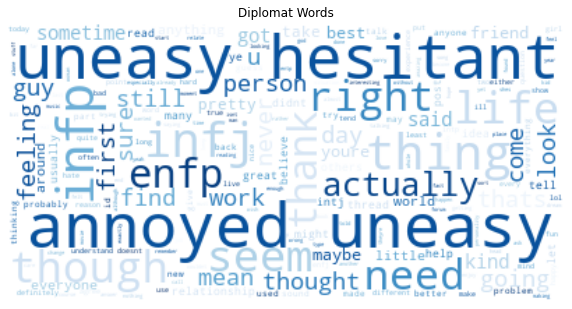

In [131]:
wc = WordCloud(background_color='white', colormap = 'Blues').generate(' '.join(Diplomat_words))
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Diplomat Words')
plt.show()

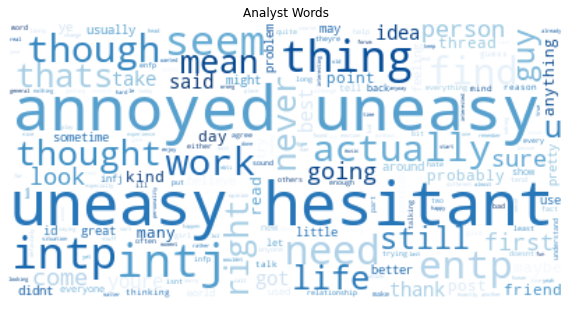

In [132]:
wc = WordCloud(background_color='white', colormap = 'Blues').generate(' '.join(Analyst_words))
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Analyst Words')
plt.show()

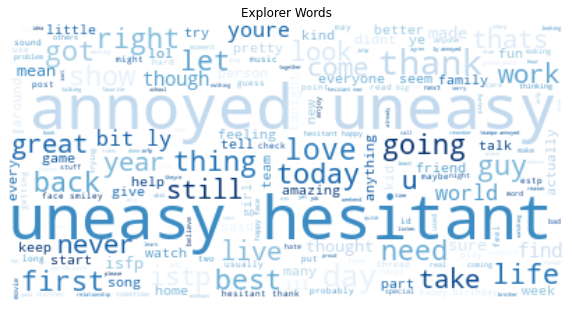

In [133]:
wc = WordCloud(background_color='white', colormap = 'Blues').generate(' '.join(Explorer_words))
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Explorer Words')
plt.show()

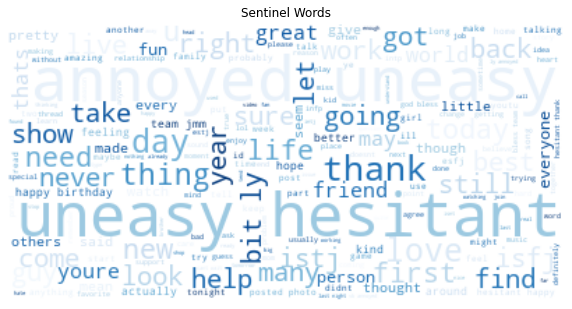

In [134]:
wc = WordCloud(background_color='white', colormap = 'Blues').generate(' '.join(Sentinel_words))
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Sentinel Words')
plt.show()

In [135]:
all_words = (' '.join(train.lemmatized)).split()
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))


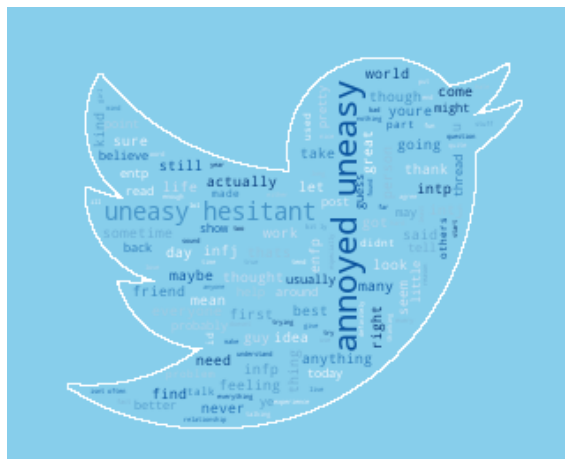

In [136]:
# Importing mask
from PIL import Image

twitter_mask = np.array(Image.open("./Twitter.png"))

# Plot the wordcloud with the mask applied
wc = WordCloud(background_color='skyblue', mask= twitter_mask, colormap = 'Blues',
               contour_color='white', contour_width=1).generate(' '.join(all_words))
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [141]:
import random

a_list = ['TF-IDF', 'Bag of Words', 'Random Forest', 'GradientBoosting', 'XGradientBoosting', 'Decision Tree', 'Logistic Regression',
         'Clustering', 'GridSearch', 'Pipeline', 'Modeling', 'Train', 'Validate', 'Test', 'Accuracy',
         'Classification', 'MultinomialNB', 'K-Nearest Neighbors', 'Linear Discriminant Analysis',
         'Support Vector Machines']

random_words = [random.choice(a_list) for _ in range(2000)]

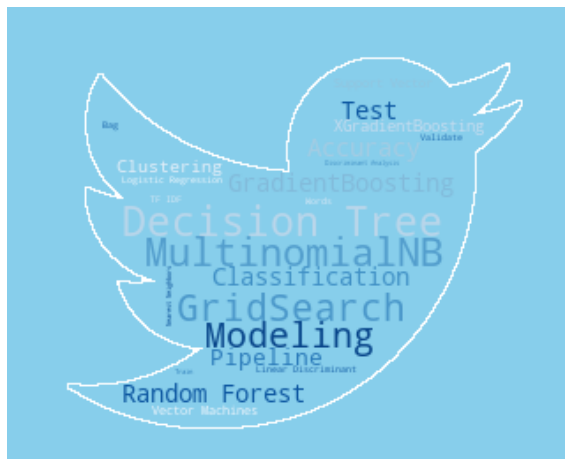

In [142]:
# Importing mask
from PIL import Image

twitter_mask = np.array(Image.open("./Twitter.png"))

# Plot the wordcloud with the mask applied
wc = WordCloud(background_color='skyblue', mask= twitter_mask, colormap = 'Blues',
               contour_color='white', contour_width=1).generate(' '.join(random_words))
plt.figure(figsize=[10,10])
plt.tight_layout()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()